<a href="https://colab.research.google.com/github/ChrisKantor/Deep-Learning/blob/main/Project%201/Deep_Learning_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Deep Learning model that can identify the state of different cooking ingredients

#submit accuracy/loss figures for each epoch for both training and validation data

#https://www.tensorflow.org/tutorials/images/classification

#focus on getting a working model for pt 2. try a simple one first, then gradually increase complexity until we acheive overfitting. submit accuracy/loss figures for this part
#pt3 is all about hyperparameter tuning/data augmentation

# Loading Data

In [14]:
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
import os
from matplotlib import pyplot as plt
import PIL
from tensorflow import keras

## Mount Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project 1/data/'

Mounted at /content/drive


In [15]:
#Some hyperparameter setup
image_size = (160, 160)   #set image size to 160 x 160
batch_size = 32           #set abatch size to 32
epochs = 15               #set num epochs to 15
label_mode = 'int' #'categorical' uses categorical_crossentropy , 'int' uses sparse_categorical_crossentropy

In [16]:
#load data set
#Loading training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + 'train/',
    image_size = image_size,
    batch_size = batch_size,
    label_mode = label_mode,
    seed = 8312001,
)

#Loading validation dataset
valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + 'valid/',
    image_size = image_size,
    batch_size = batch_size,
    label_mode = label_mode,
    seed = 8312001
)

Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.


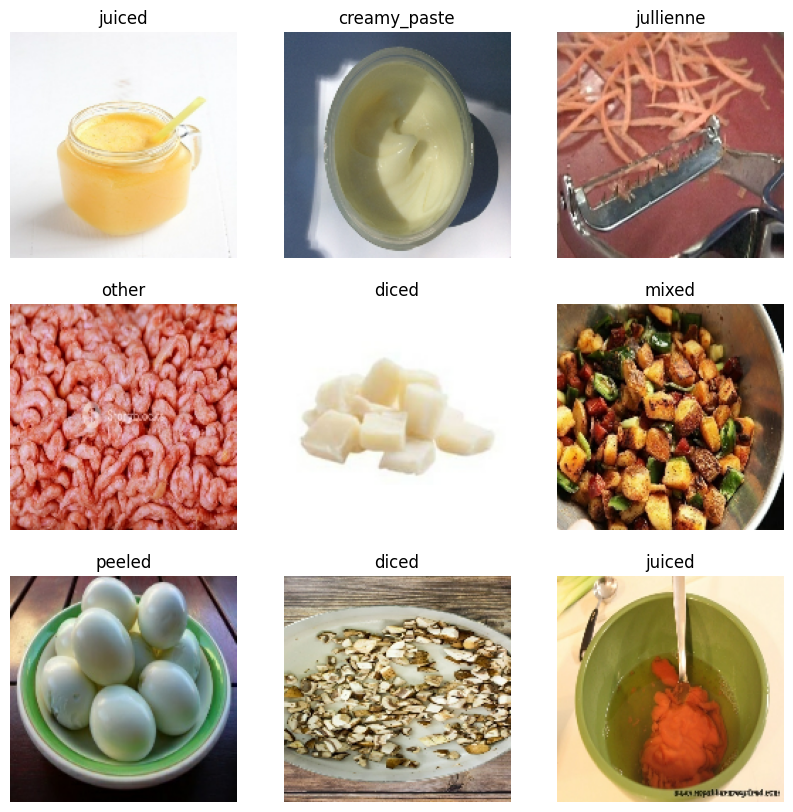

In [17]:
# #display example photos from dataset
# class_names = train_ds.class_names
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(11):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

In [ ]:
#Configuring dataset for performance
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Creating and Training

In [18]:
num_classes = 11

#data augmentation layers. using random flip, brightness, and rotation augmentations
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomBrightness(factor=0.2)

])

#use rescaling layer to normalize inputs.
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 40, 32)        0         
 g2D)                                                 

In [ ]:
#save best model
#in this case, we are overfitting the model to ensure it is complex enough to learn the problem, so we are saving the generation with the best TRAINING accuracy
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project 1/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)



history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs,
    callbacks=[model_checkpoint_callback]
)


#load the best model using the callback
model.load_weights(checkpoint_filepath)

print("\n\nEvaluating Best Model\n")
#evaluation the model on the validation data
model.evaluate(valid_ds, verbose=2)

Epoch 1/15
226/226 [==============================] - 43s 180ms/step - loss: 2.2259 - accuracy: 0.1937 - val_loss: 2.1781 - val_accuracy: 0.2288
Epoch 2/15
226/226 [==============================] - 41s 178ms/step - loss: 2.0100 - accuracy: 0.2864 - val_loss: 1.9899 - val_accuracy: 0.2826
Epoch 3/15
226/226 [==============================] - 42s 181ms/step - loss: 1.8465 - accuracy: 0.3447 - val_loss: 1.9454 - val_accuracy: 0.3072
Epoch 4/15
226/226 [==============================] - 41s 179ms/step - loss: 1.5668 - accuracy: 0.4538 - val_loss: 2.0042 - val_accuracy: 0.3124
Epoch 5/15
226/226 [==============================] - 45s 191ms/step - loss: 1.2358 - accuracy: 0.5767 - val_loss: 2.2197 - val_accuracy: 0.3033
Epoch 6/15
226/226 [==============================] - 42s 180ms/step - loss: 0.9296 - accuracy: 0.6867 - val_loss: 2.7274 - val_accuracy: 0.3202
Epoch 7/15
226/226 [==============================] - 41s 179ms/step - loss: 0.6496 - accuracy: 0.7912 - val_loss: 3.1351 - val_ac

[6.4794464111328125, 0.32145172357559204]

In [ ]:
print(history.history)
#save the model
model.save("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project 1/bestModel.keras")
print("Saved Model")

{'loss': [2.225933313369751, 2.009967803955078, 1.8464794158935547, 1.5667656660079956, 1.2357814311981201, 0.9295903444290161, 0.6496209502220154, 0.4401185214519501, 0.2921287715435028, 0.22462338209152222, 0.16784608364105225, 0.11728169769048691, 0.11237654834985733, 0.1286967396736145, 0.07911452651023865], 'accuracy': [0.193678081035614, 0.2864272892475128, 0.34465548396110535, 0.45376405119895935, 0.5767364501953125, 0.6866768598556519, 0.7912102937698364, 0.8588659167289734, 0.9083598852157593, 0.9288784265518188, 0.9523083567619324, 0.9664494395256042, 0.9653403759002686, 0.965201735496521, 0.9786496758460999], 'val_loss': [2.1781418323516846, 1.9898697137832642, 1.9453636407852173, 2.0041911602020264, 2.219705104827881, 2.7274067401885986, 3.1350953578948975, 3.5634353160858154, 4.6681742668151855, 4.737783432006836, 4.828519344329834, 5.610086441040039, 5.965859413146973, 6.048470973968506, 6.47944450378418], 'val_accuracy': [0.22877511382102966, 0.2825664281845093, 0.307193

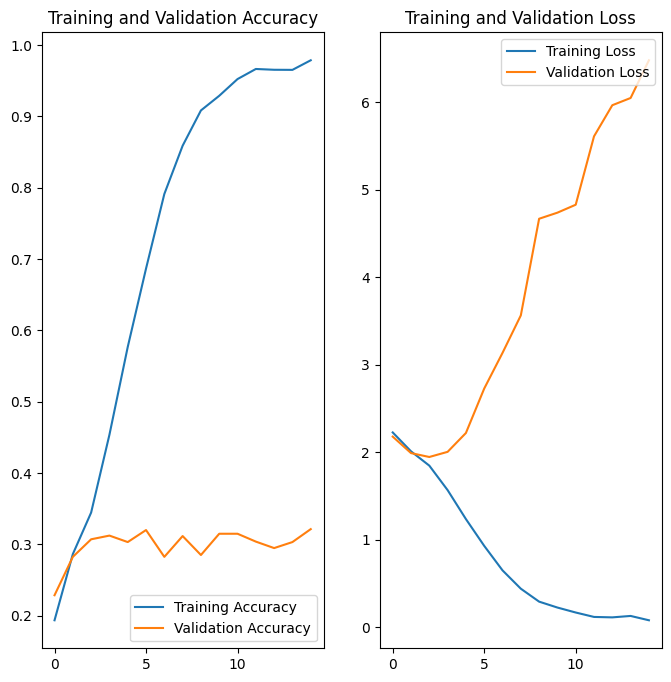

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing Script

In [ ]:
#load pretrained model and test it on a loaded test dataset to verify results
#import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
import os
from matplotlib import pyplot as plt

#load the model from a saved file
model = tf.keras.models.load_model("bestModel.keras")

#create array representing our labels
label_names = ['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'julienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']

#read in the ground truth json in the test folder which holds the labels for each file
testData = pd.read_json('test/ground_truth.json', orient='index').reset_index()
testData.columns = ['Image Name', 'Label']

#now we a dataframe with two columns. The first column holds the name of each image, and the second column holds the label for that image that we parsed from the provided json file
print(testData.head())

Mounted at /content/drive
  Image Name    Label
0   0071.jpg  floured
1   0065.jpg    whole
2   0059.jpg   sliced
3   0515.jpg   grated
4   0273.jpg    other


In [ ]:
#save our ouput to a json file line by line
with open('output.json', 'w') as f:
  f.write('{\n')    #write opening bracket

  for index, row in testData.iterrows():
    imgName = row['Image Name']
    img = tf.io.read_file('test/anonymous/' + imgName)
    img = tf.io.decode_jpeg(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [160, 160])    #resize image to 160 x 160, the same size used during training

    #expand the image and make a prediction
    img = (np.expand_dims(img,0))
    prediction = model.predict(img)

    #write the filename and our prediction to our output json file
    f.write(f'    "{imgName}": "{label_names[np.argmax(prediction[0])]}",\n')

  f.write('}')      #write closing bracket

1/1 [==============================] - 0s 19ms/step


In [11]:
#Finding testing accuracy
data_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Project 1/'

#count how many times each label appears
truth_map = {}
predict_map = {}
total = 0.0
correct = 0.0

with open(data_dir + 'data/test/ground_truth.json') as truth_file, open(data_dir + 'output.json') as predict_file:
    for truth, predict in zip(truth_file, predict_file):
      total += 1

      #clean string
      truth_label = [s for s in truth if s.isalnum() or s.isspace()]
      truth_label = "".join(truth_label)

      predict_label = [s for s in predict if s.isalnum() or s.isspace()]
      predict_label = "".join(predict_label)

      if truth_label == predict_label and truth_label != '':
        correct += 1


      truth_label = truth_label.split()
      predict_label = predict_label.split()

      if len(truth_label) == 0 or len(predict_label) == 0:
        continue

      if truth_label[1] not in truth_map:
        truth_map[truth_label[1]] = 1

      else:
        truth_map[truth_label[1]] += 1

      if predict_label[1] not in predict_map:
        predict_map[predict_label[1]] = 1

      else:
        predict_map[predict_label[1]] += 1



print(f'\nTruth Labels:')
print(truth_map)
print(f'\npredict Labels:')
print(predict_map)
print(f'\nTotal Labels: {total}, Correct Labels: {correct}, acc: {correct/total}')


Truth Labels:
{'floured': 42, 'whole': 54, 'sliced': 90, 'grated': 37, 'other': 53, 'peeled': 29, 'juiced': 57, 'creamypaste': 36, 'diced': 46, 'mixed': 40, 'jullienne': 36}

predict Labels:
{'diced': 520}

Total Labels: 522.0, Correct Labels: 47.0, acc: 0.09003831417624521
